In [91]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, SimpleRNN, LSTM
from keras.datasets import imdb
from keras import preprocessing
from keras import utils


In [2]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

In [22]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
print(f'Each word is encoded in a number{tokenizer.word_index}')
sequences = tokenizer.texts_to_sequences(samples)
print(f'Then out list of sequences is changed with numbers {sequences}')
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
print(f'The second sequence in sample is encoded like this: \n {one_hot_results[1]}, \
      \n The total len of list is equal to param num_words')
# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))



Each word is encoded in a number{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}
Then out list of sequences is changed with numbers [[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
The second sequence in sample is encoded like this: 
 [0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 

In [24]:
embedding_layer = Embedding(input_dim = 1000, output_dim = 64)

In [27]:
max_features = 10000
maxlen = 20

In [58]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [62]:
#The IMDB dataset contains of 25'000 movie review. The words are encoded according to overall frequency
print(f'X_train.shape={x_train.shape}')
print(f'X_train[0]={x_train[0]}')
len(x_train[0])

X_train.shape=(25000,)
X_train[0]=[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


218

In [78]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
 [reverse_word_index.get(i - 3, '?') for i in x_train[0]])
print(f"Total number of words in 1st review: {len(decoded_review.split(' '))}")
print(f'The review itself: \n {decoded_review}')


Total number of words in 1st review: 218
The review itself: 
 ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazi

In [79]:
#From the full review we take only first 20 words
x_train_new = utils.pad_sequences(x_train, maxlen=maxlen, truncating='post')
x_test_new = utils.pad_sequences(x_test, maxlen=maxlen, truncating='post')

In [80]:
x_train_new[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25])

In [85]:
#input_dim = Max number of words in a dictionary
model = Sequential()
model.add(Embedding(input_dim =10000, output_dim = 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
metrics=['acc'])
model.summary()
history = model.fit(x_train_new, y_train,
 epochs=10,
 batch_size=32,
 validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten_1 (Flatten)         (None, 160)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 5s 4ms/step - loss: 0.6846 - acc: 0.5687 - val_loss: 0.6663 - val_acc: 0.6200
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6200 - acc: 0.6863 - val_loss: 0.6088 - val_acc: 0.6696
Epoch 3/10
625/625 [==============================

Try to use RNN

In [88]:
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
 num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = utils.pad_sequences(input_train, maxlen=maxlen)
input_test = utils.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [89]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
 epochs=10,
 batch_size=128,
 validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 54s 328ms/step - loss: 0.5724 - acc: 0.6921 - val_loss: 0.4838 - val_acc: 0.7944
Epoch 2/10
157/157 [==============================] - 52s 332ms/step - loss: 0.3500 - acc: 0.8589 - val_loss: 0.3634 - val_acc: 0.8402
Epoch 3/10
157/157 [==============================] - 47s 298ms/step - loss: 0.2602 - acc: 0.8993 - val_loss: 0.4310 - val_acc: 0.8216
Epoch 4/10
157/157 [==============================] - 49s 313ms/step - loss: 0.2102 - acc: 0.9198 - val_loss: 0.4488 - val_acc: 0.8128
Epoch 5/10
157/157 [==============================] - 46s 293ms/step - loss: 0.1506 - acc: 0.9452 - val_loss: 0.3954 - val_acc: 0.8348
Epoch 6/10
157/157 [==============================] - 46s 291ms/step - loss: 0.1077 - acc: 0.9628 - val_loss: 0.4328 - val_acc: 0.8306
Epoch 7/10
157/157 [==============================] - 48s 306ms/step - loss: 0.0712 - acc: 0.9771 - val_loss: 0.5276 - val_acc: 0.8114
Epoch 8/10
157/157 [==============================] - 4

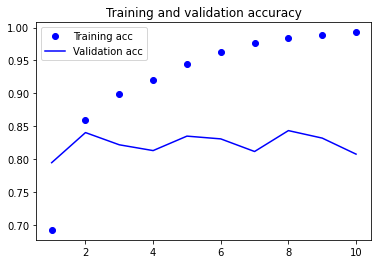

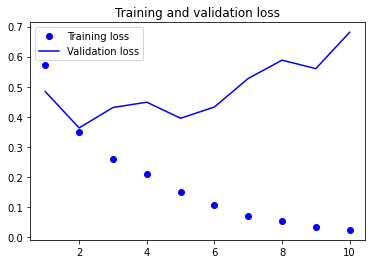

In [90]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [92]:
%%time
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['acc'])
history = model.fit(input_train, y_train,
 epochs=10,
 batch_size=128,
 validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 12s 44ms/step - loss: 0.5094 - acc: 0.7520 - val_loss: 0.6705 - val_acc: 0.7030
Epoch 2/10
157/157 [==============================] - 6s 37ms/step - loss: 0.3008 - acc: 0.8855 - val_loss: 0.2773 - val_acc: 0.8882
Epoch 3/10
157/157 [==============================] - 6s 39ms/step - loss: 0.2392 - acc: 0.9105 - val_loss: 0.3151 - val_acc: 0.8802
Epoch 4/10
157/157 [==============================] - 6s 39ms/step - loss: 0.2010 - acc: 0.9272 - val_loss: 0.2848 - val_acc: 0.8834
Epoch 5/10
157/157 [==============================] - 6s 39ms/step - loss: 0.1754 - acc: 0.9378 - val_loss: 0.2844 - val_acc: 0.8808
Epoch 6/10
157/157 [==============================] - 6s 39ms/step - loss: 0.1558 - acc: 0.9449 - val_loss: 0.3016 - val_acc: 0.8912
Epoch 7/10
157/157 [==============================] - 6s 37ms/step - loss: 0.1463 - acc: 0.9492 - val_loss: 0.3127 - val_acc: 0.8810
Epoch 8/10
157/157 [==============================] - 6s 39ms/step -

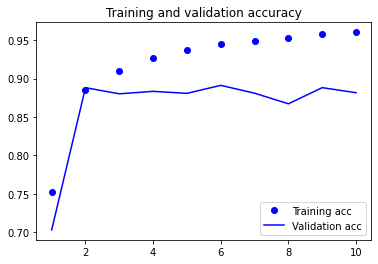

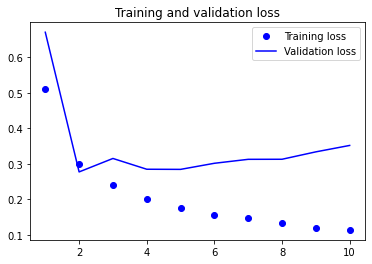

In [93]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()